In [73]:
# Importer les bibliothèques nécessaires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#to visualize the dataset
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
# machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

#for classification tasks
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor

#metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, r2_score

from sklearn.preprocessing import LabelEncoder


In [74]:
df = pd.read_csv("IRIS.csv")
df.shape

(150, 5)

In [75]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [76]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [78]:
df.duplicated().sum()

np.int64(3)

In [79]:
df.drop_duplicates(inplace=True)

In [80]:
df.duplicated().sum()

np.int64(0)

In [81]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Mean: 5.856462585034014
Median: 5.8
Mode: 5.0


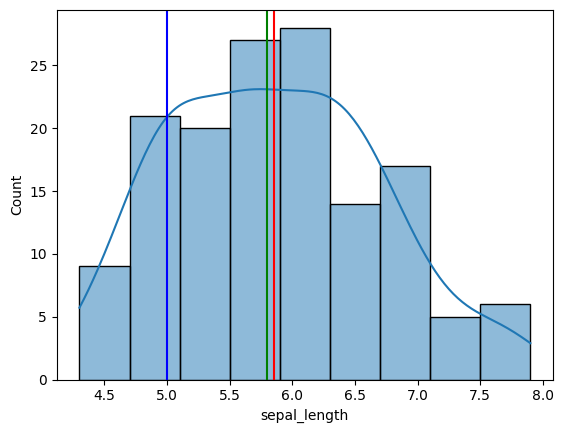

In [82]:
# plot the mean, median and mode of sepal_length column using sns
sns.histplot(df['sepal_length'], kde=True)
plt.axvline(df['sepal_length'].mean(), color='red')
plt.axvline(df['sepal_length'].median(), color='green')
plt.axvline(df['sepal_length'].mode()[0], color='blue')

# print the value of mean, median and mode of sepal_length column
print('Mean:', df['sepal_length'].mean())
print('Median:', df['sepal_length'].median())
print('Mode:', df['sepal_length'].mode()[0])

In [83]:
for col in df.columns:
   print(col,":" ,len(df[col].unique()))

sepal_length : 35
sepal_width : 23
petal_length : 43
petal_width : 22
species : 3


In [84]:
unique_sep = df['species'].unique()
label_encoder = {}
for i in range(len(unique_sep)) :
    label_encoder[unique_sep[i]] = i
label_encoder

{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

In [85]:
df['species_enc'] = df['species'].map(label_encoder)

In [86]:
df

,sepal_length,sepal_width,petal_length,petal_width,species,species_enc
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


In [87]:
# Create a label encoder object
le = LabelEncoder()

# Encode the 'species' column
df['species_enc'] = le.fit_transform(df['species'])
df

,sepal_length,sepal_width,petal_length,petal_width,species,species_enc
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


In [88]:
X = df.drop(['species', 'species_enc'], axis=1)
y = df['species_enc']


In [89]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species_enc, Length: 147, dtype: int64

In [90]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [91]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [92]:
xtest

,sepal_length,sepal_width,petal_length,petal_width
127,6.1,3.0,4.9,1.8
53,5.5,2.3,4.0,1.3
140,6.7,3.1,5.6,2.4
19,5.1,3.8,1.5,0.3
106,4.9,2.5,4.5,1.7
12,4.8,3.0,1.4,0.1
78,6.0,2.9,4.5,1.5
31,5.4,3.4,1.5,0.4
83,6.0,2.7,5.1,1.6
9,4.9,3.1,1.5,0.1


In [93]:
ytest

127    2
53     1
140    2
19     0
106    2
12     0
78     1
31     0
83     1
9      0
26     0
98     1
146    2
69     1
136    2
68     1
18     0
71     1
126    2
30     0
29     0
107    2
38     0
120    2
57     1
22     0
66     1
135    2
84     1
11     0
Name: species_enc, dtype: int64

In [94]:
model = RandomForestClassifier(random_state=42)


In [95]:
xtrain.shape

(117, 4)

In [96]:
xtest.shape

(30, 4)

In [97]:
# Call the Model
model = RandomForestClassifier(random_state=42)

In [98]:
# Train the model
model.fit(xtrain, ytrain)



RandomForestClassifier(random_state=42)

In [99]:
model = RandomForestClassifier(n_estimators=10, random_state=42)
model.fit(xtrain , ytrain)

RandomForestClassifier(n_estimators=10, random_state=42)

In [100]:
from sklearn.metrics import accuracy_score, classification_report

In [101]:
# Make predictions on the test set
y_pred = model.predict(xtest)
accuracy = accuracy_score(ytest, y_pred)
classification_rep = classification_report(ytest, y_pred)
print(accuracy)
print(classification_rep)

0.9333333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.90      0.90      0.90        10
           2       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [102]:
# Make predictions on the testing data
ypred = model.predict(xtest)

# Print the accuracy of the model
print('Accuracy:', accuracy_score(ytest, ypred))

# Print the classification report
print(classification_report(ytest, ypred))


Accuracy: 0.9333333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.90      0.90      0.90        10
           2       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [119]:
import pickle

# Save the model to a file
with open('Iris_model.pkl', 'wb') as f:
    pickle.dump(model, f)


In [104]:
# Load the model from the file
with open('Iris_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

In [105]:
import numpy as np
import pandas as pd
import pickle

In [106]:
# Load the model from the file
with open('Iris_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

In [ ]:
print(xtest)

     sepal_length  sepal_width  petal_length  petal_width
127           6.1          3.0           4.9          1.8
53            5.5          2.3           4.0          1.3
140           6.7          3.1           5.6          2.4
19            5.1          3.8           1.5          0.3
106           4.9          2.5           4.5          1.7
12            4.8          3.0           1.4          0.1
78            6.0          2.9           4.5          1.5
31            5.4          3.4           1.5          0.4
83            6.0          2.7           5.1          1.6
9             4.9          3.1           1.5          0.1
26            5.0          3.4           1.6          0.4
98            5.1          2.5           3.0          1.1
146           6.3          2.5           5.0          1.9
69            5.6          2.5           3.9          1.1
136           6.3          3.4           5.6          2.4
68            6.2          2.2           4.5          1.5
18            

In [ ]:
ytest

127    2
53     1
140    2
19     0
106    2
12     0
78     1
31     0
83     1
9      0
26     0
98     1
146    2
69     1
136    2
68     1
18     0
71     1
126    2
30     0
29     0
107    2
38     0
120    2
57     1
22     0
66     1
135    2
84     1
11     0
Name: species_enc, dtype: int64

In [115]:
# Create a new data point
#6.1          3.0           4.9          1.8
new_data = np.array([[6.1 , 3.0, 4.9, 1.8]])

In [116]:
print(new_data)

[[6.1 3.  4.9 1.8]]


In [117]:
# Use the loaded model to make predictions
predictions = loaded_model.predict(new_data)
# Print the predictions
print('Predictions:', predictions)

Predictions: [2]


/home/hmi/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
